**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Objective**: To  build a multiclass classification model using a custom convolutional neural network in TensorFlow.



**Data Description:**
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

    Actinic keratosis
    Basal cell carcinoma
    Dermatofibroma
    Melanoma
    Nevus
    Pigmented benign keratosis
    Seborrheic keratosis
    Squamous cell carcinoma
    Vascular lesion

**1. Data reading and Data Understanding**

In [24]:
#Install libraries
!pip install Augmentor
#Import libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import Augmentor

In [25]:
## Mounting the google drive :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
#Defining the path to the drive
root_path = '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

**2. Dataset Creation:**
Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180 X 180.

In [27]:
#Defining parameters
batch = 32
iheight = 180
iwidth = 180

In [28]:
#Training data creation
img_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(iheight, iwidth),
    batch_size=batch)

Found 2264 files belonging to 9 classes.
Using 1812 files for training.


In [29]:
#Validation data creation
img_val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(iheight, iwidth),
    batch_size=batch)

Found 2264 files belonging to 9 classes.
Using 452 files for validation.


In [30]:
#Test data creation
img_test = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(iheight, iwidth),
  batch_size=batch)

Found 118 files belonging to 9 classes.


In [31]:
# Names of classes of skin cancer listed for train dataset
class_names = img_train.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**3. Dataset Visualization:**Create a code to visualize one instance of all the nine classes present in the dataset

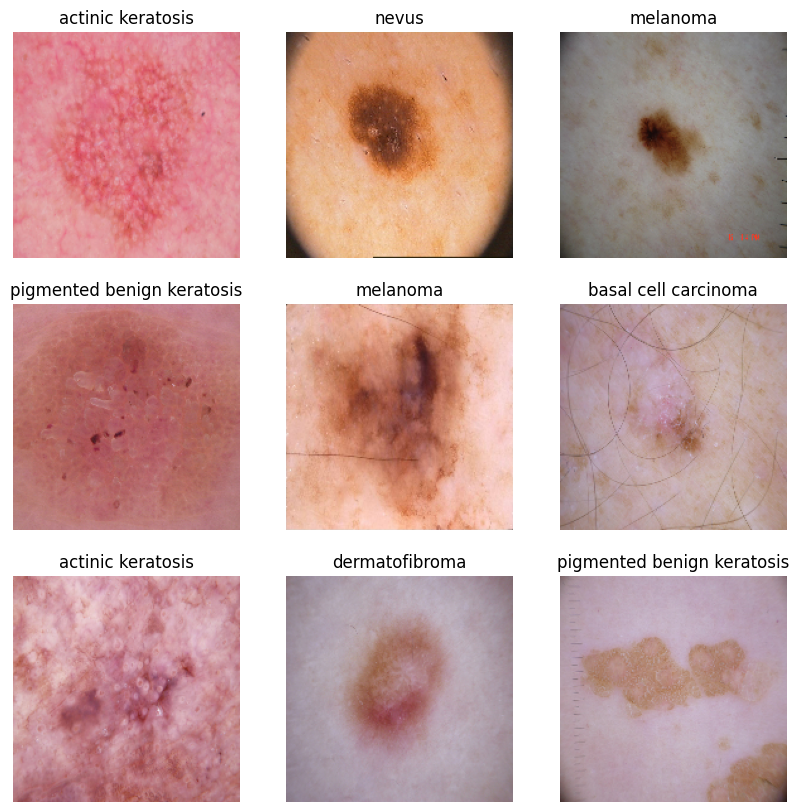

In [32]:
#Visualizing the training dataset
plt.figure(figsize=(10, 10))
for images, labels in img_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [33]:
#Storing data in cache and bringing them into the cache before the processor requests them
AUTOTUNE = tf.data.experimental.AUTOTUNE
img_train = img_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = img_val.cache().prefetch(buffer_size=AUTOTUNE)

**4. Model building and training:**


    a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
    b. Choose an appropriate optimiser and loss function for model training
    c. Train the model for ~20 epochs
    d. Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.

In [34]:
# 4a. Rescale images to normalize pixel values between (0,1)
target_class = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(iheight, iwidth, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_class)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
## 4b.Choose an appropriate optimiser and loss function for model training ##
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
# 4c. Train the model for ~20 epochs
%%time
epochs = 20
history = model.fit(
  img_train,
  validation_data=img_val,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.1891 - loss: 2.3229 - val_accuracy: 0.2389 - val_loss: 1.9675
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3035 - loss: 1.8766 - val_accuracy: 0.3739 - val_loss: 1.7056
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4308 - loss: 1.5780 - val_accuracy: 0.4735 - val_loss: 1.5134
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5505 - loss: 1.3432 - val_accuracy: 0.4535 - val_loss: 1.5069
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5662 - loss: 1.2528 - val_accuracy: 0.4159 - val_loss: 1.6543
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5721 - loss: 1.2649 - val_accuracy: 0.4934 - val_loss: 1.5903
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6034 - loss: 1.1360 - val_accuracy: 0.5000 - val_loss: 1.4410
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6155 - loss: 1.1128 - val_accuracy: 0.4978 - val_los

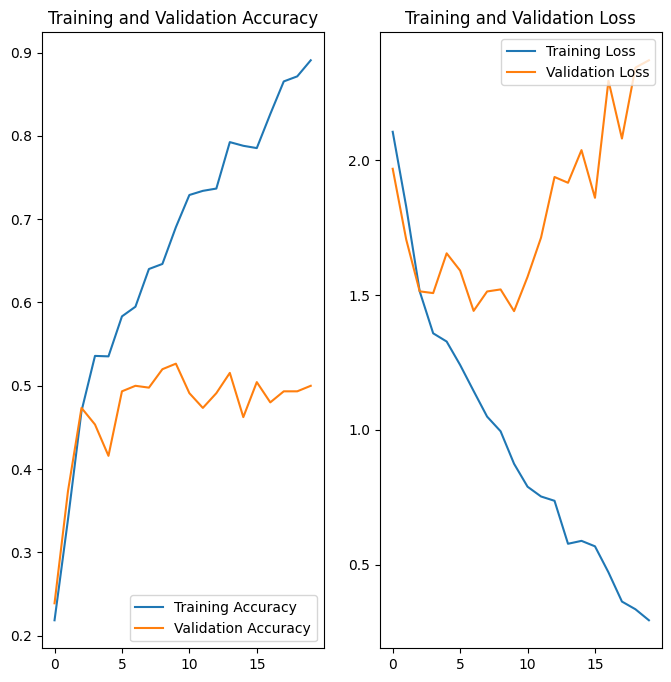

In [37]:
#4d. Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings:**

a. **Accuracy**:
The training accuracy is increasing to  0.8757 which closer to 1 while validation accuracy is close to 0.55

b. **Loss**:
The training loss is decreasing to from 2 to 0.2 while validation loss increases to 2.5

Since, the data performs well on training data but not on validation data set. Hence, the data is **overfitting**

**5.Chose an appropriate data augmentation strategy to resolve underfitting/overfitting**

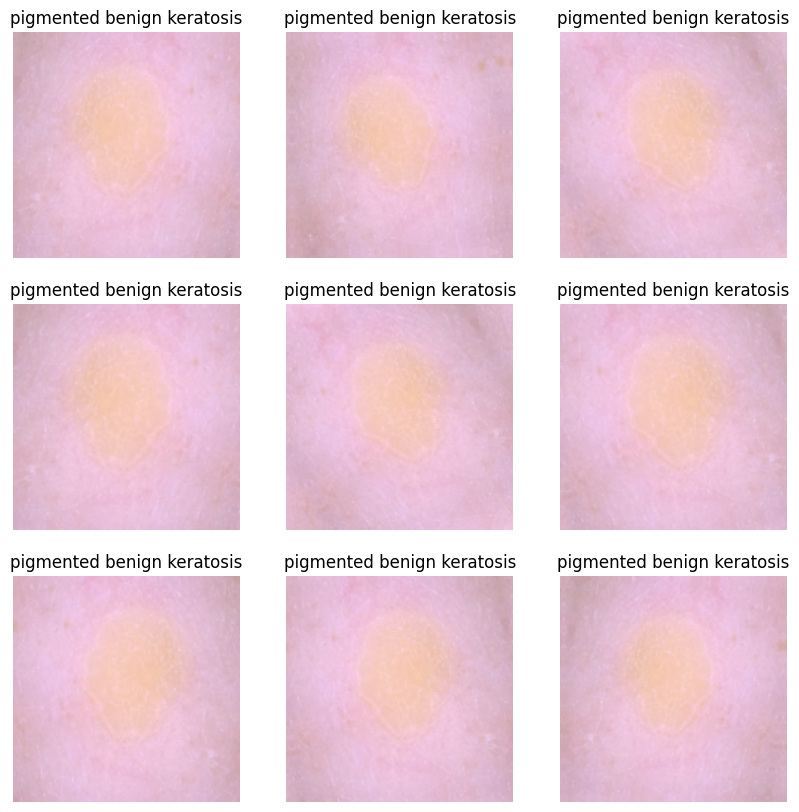

In [38]:
augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal", input_shape=(iheight, iwidth, 3)),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1),
])

#Visualization of augmented data
plt.figure(figsize=(10, 10))
for images, labels in img_train.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

**6. Model Building & training on the augmented data :**

    a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
    b. Choose an appropriate optimiser and loss function for model training
    c. Train the model for ~20 epochs
    d. Write your findings after the model fit, see if the earlier issue is resolved or not?

In [39]:
#6a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_class)
])

In [40]:
#6b. Choose an appropriate optimiser and loss function for model training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
#6c. Train the model for ~20 epochs
%%time
epochs = 20
history = model.fit(
  img_train,
  validation_data=img_val,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1783 - loss: 2.4523 - val_accuracy: 0.2478 - val_loss: 1.9910
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3045 - loss: 1.9255 - val_accuracy: 0.3296 - val_loss: 1.8598
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.3675 - loss: 1.7394 - val_accuracy: 0.4513 - val_loss: 1.5200
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5027 - loss: 1.4652 - val_accuracy: 0.5022 - val_loss: 1.4402
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4928 - loss: 1.4675 - val_accuracy: 0.4513 - val_loss: 1.5005
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5065 - loss: 1.4063 - val_accuracy: 0.4956 - val_loss: 1.4852
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5355 - loss: 1.3220 - val_accuracy: 0.5044 - val_loss: 1.4061
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5526 - loss: 1.2580 - val_accuracy: 0.4757 - val_los

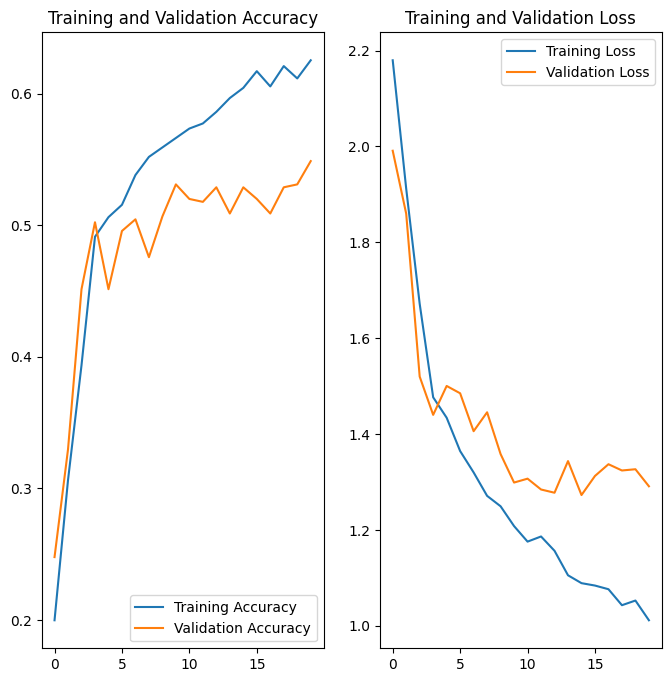

In [42]:
#6d. Write your findings after the model fit, see if the earlier issue is resolved or not?
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**7. Class distribution: Examine the current class distribution in the training dataset**

    - Which class has the least number of samples?
    - Which classes dominate the data in terms of the proportionate number of samples?

In [43]:
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels distribution (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
image_dict = dict(zip(images_path_list, lesions_list))
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])
lesions_df[['Label']].value_counts()

,count
Label,
pigmented benign keratosis,463
melanoma,445
basal cell carcinoma,393
nevus,357
squamous cell carcinoma,181
vascular lesion,139
actinic keratosis,114
dermatofibroma,95
seborrheic keratosis,77


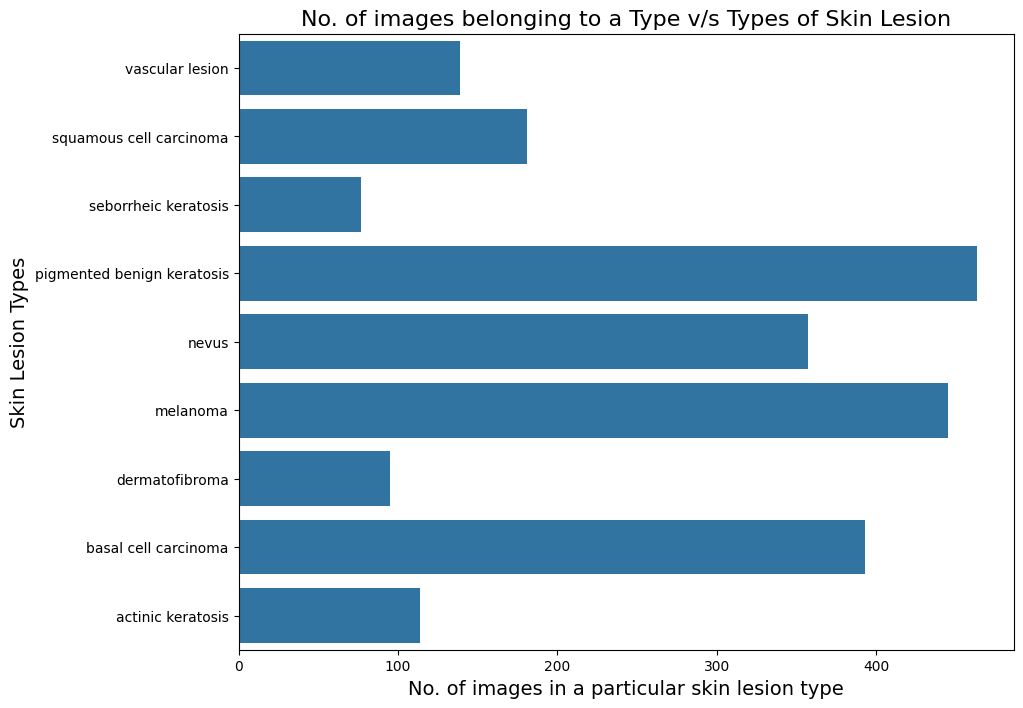

In [44]:
#Visualizing the distribution
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df)
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [45]:
# % Class distribution
round(lesions_df[['Label']].value_counts(normalize=True)*100, 2)

,proportion
Label,
pigmented benign keratosis,20.45
melanoma,19.66
basal cell carcinoma,17.36
nevus,15.77
squamous cell carcinoma,7.99
vascular lesion,6.14
actinic keratosis,5.04
dermatofibroma,4.20
seborrheic keratosis,3.40



- Which class has the least number of samples?

A: seborrheic keratosis has least number of samples with 3% contribution

- Which classes dominate the data in terms of the proportionate number of samples?

A: pigmented benign keratosis 	and melanoma dominate the number of samples with 20 % and 19% contribution



**8. Handling class imbalances:**

 Rectify class imbalances present in the training dataset with Augmentor library.

In [46]:
path_to_training_dataset = str(data_dir_train) + '/'

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

#Class Distribution after augmentation
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = lesions_df._append(df2,ignore_index=True)
new_df['Label'].value_counts()


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2161912DA0>: 100%|██████████| 500/500 [00:27<00:00, 18.18 Samples/s]


Initialised with 393 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2153661E70>: 100%|██████████| 500/500 [00:28<00:00, 17.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D214B4723B0>: 100%|██████████| 500/500 [00:28<00:00, 17.44 Samples/s]


Initialised with 445 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D214BEFD180>: 100%|██████████| 500/500 [01:45<00:00,  4.73 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7D216160CEE0>: 100%|██████████| 500/500 [01:49<00:00,  4.55 Samples/s]


Initialised with 463 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2161910970>: 100%|██████████| 500/500 [00:30<00:00, 16.48 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D214A12D630>: 100%|██████████| 500/500 [00:56<00:00,  8.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D21617A9420>: 100%|██████████| 500/500 [00:28<00:00, 17.37 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D214B4DC4C0>: 100%|██████████| 500/500 [00:31<00:00, 16.09 Samples/s]


,count
Label,
pigmented benign keratosis,963
melanoma,945
basal cell carcinoma,893
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


In [47]:
# %Class distribution
round(new_df['Label'].value_counts(normalize=True)*100, 2)

,proportion
Label,
pigmented benign keratosis,14.24
melanoma,13.97
basal cell carcinoma,13.20
nevus,12.67
squamous cell carcinoma,10.07
vascular lesion,9.45
actinic keratosis,9.08
dermatofibroma,8.80
seborrheic keratosis,8.53


**9. Model Building & training on the rectified class imbalance data :**

    a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
    b. Choose an appropriate optimiser and loss function for model training
    c. Train the model for ~30 epochs
    d. Write your findings after the model fit, see if the issues are resolved or not?

In [48]:
#9a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

#Training augmented dataset split
aug_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(iheight, iwidth),
  batch_size=batch)
# Validation_data_split
aug_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(iheight, iwidth),
  batch_size=batch)
#Create model
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_class)
])

Found 6764 files belonging to 9 classes.
Using 5412 files for training.
Found 6764 files belonging to 9 classes.
Using 1352 files for validation.


In [49]:
#9b. Choose an appropriate optimiser and loss function for model training

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
#9c. Train the model for ~30 epochs
%%time
epochs = 30
history = model.fit(
  img_train,
  validation_data=img_val,
  epochs=epochs
)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.3021 - loss: 5.2220 - val_accuracy: 0.0465 - val_loss: 8.2877
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.4391 - loss: 1.6999 - val_accuracy: 0.0642 - val_loss: 13.8576
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4605 - loss: 1.6256 - val_accuracy: 0.0664 - val_loss: 17.2390
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4801 - loss: 1.5351 - val_accuracy: 0.0708 - val_loss: 18.5022
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5255 - loss: 1.3994 - val_accuracy: 0.0730 - val_loss: 17.4596
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5272 - loss: 1.3571 - val_accuracy: 0.1681 - val_loss: 10.7957
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5249 - loss: 1.3099 - val_accuracy: 0.3119 - val_loss: 8.0355
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5723 - loss: 1.2157 - val_accuracy: 0.345

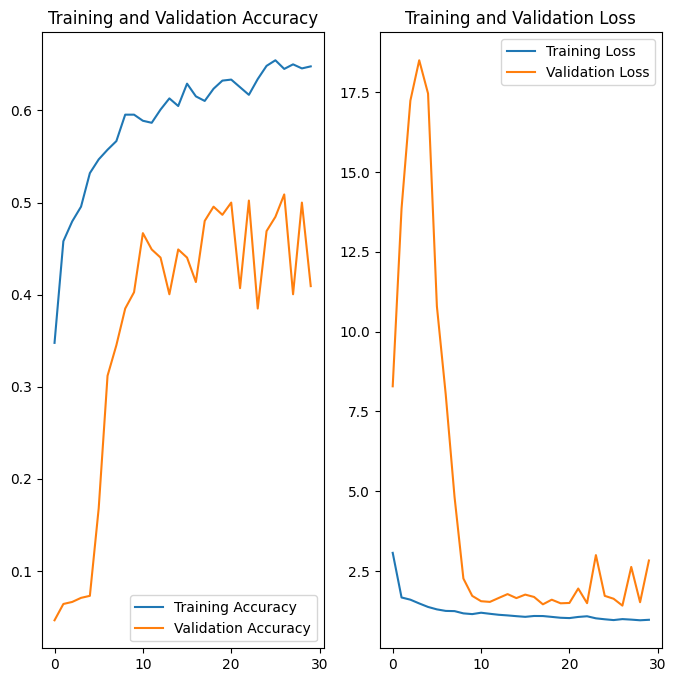

In [51]:
#d. Write your findings after the model fit, see if the issues are resolved or not?
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**:

With batch normalization there is slight improvement in accuracy. Hence, implementing with more number of epochs to see improvement

In [52]:
#Model creation with more epochs

model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_class)
])

In [53]:
#Choosing model optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
#Model training

%%time
# train the model
epochs = 50
history = model.fit(
  img_train,
  validation_data=img_val,
  epochs=epochs,
)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.3392 - loss: 4.4223 - val_accuracy: 0.1018 - val_loss: 16.1400
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5011 - loss: 1.5648 - val_accuracy: 0.1018 - val_loss: 25.1544
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5189 - loss: 1.4460 - val_accuracy: 0.1040 - val_loss: 25.7026
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5311 - loss: 1.3729 - val_accuracy: 0.1084 - val_loss: 20.7795
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5580 - loss: 1.2638 - val_accuracy: 0.1150 - val_loss: 17.2282
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5576 - loss: 1.2915 - val_accuracy: 0.1062 - val_loss: 13.7497
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.5739 - loss: 1.2329 - val_accuracy: 0.1704 - val_loss: 6.8596
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.5987 - loss: 1.1434 - val_accuracy: 0.17

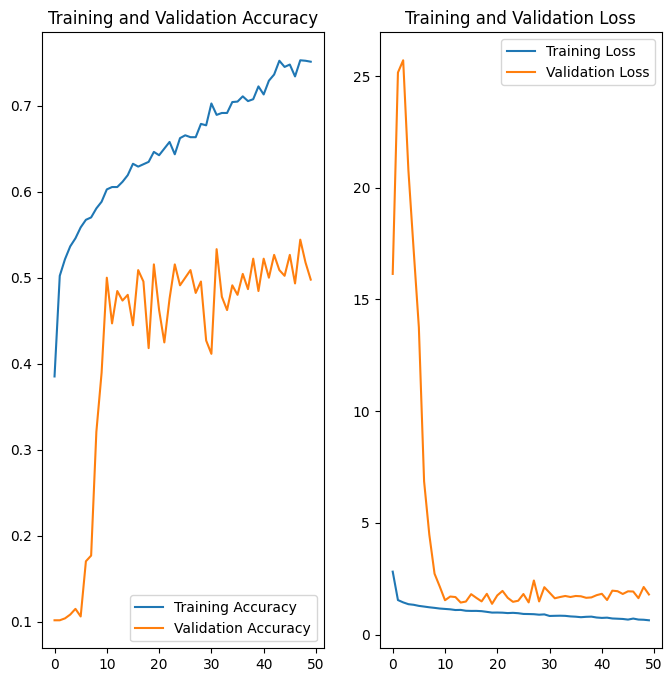

In [55]:
#Model Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()